In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_style("whitegrid")

In [32]:
df1 = pd.read_csv('dados/simulador1.csv')
df2 = pd.read_csv('dados/simulador2.csv')
df = pd.concat([df1,df2], axis=1)

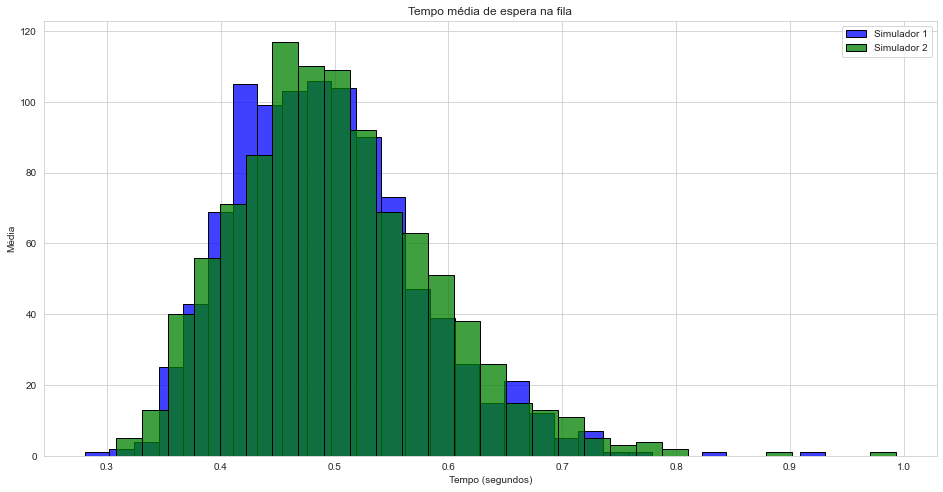

In [33]:
plt.figure(figsize=(16,8))
sns.histplot(data=df.simulador_1, bins=30, color='blue', label='Simulador 1', edgecolor='black')
sns.histplot(data=df.simulador_2, bins=30, color='green', label='Simulador 2', edgecolor='black')
plt.title('Tempo média de espera na fila')
plt.xlabel('Tempo (segundos)')
plt.ylabel('Média')
plt.legend()
plt.show()

## Detectando e removendo Outliers

In [34]:
def detect_outliers(data, remove_outliers=False):
    outlier_percents = {}
    clean_data = data.copy()
    
    for column in data.columns:
        if data[column].dtype != object:
            
            q1 = np.quantile(data[column], 0.25)
            q3 = np.quantile(data[column], 0.75)
            iqr = q3 - q1
            
            upper_bound = q3 + (1.5 * iqr)
            lower_bound = q1 - (1.5 * iqr)
            
            outliers = data[(data[column] > upper_bound) | (data[column] < lower_bound)][column]
            outlier_percentage = len(outliers) / len(data[column]) * 100
            
            outlier_percents[column] = outlier_percentage
            
            if remove_outliers:
                clean_data = clean_data[(clean_data[column] <= upper_bound) & (clean_data[column] >= lower_bound)]
    
    outlier_dataframe = pd.DataFrame(data=outlier_percents.values(), index=outlier_percents.keys(),
                                      columns=['Porcentagem Outlier'])
    
    outlier_dataframe = outlier_dataframe.sort_values(by='Porcentagem Outlier', ascending=False)
    
    if remove_outliers:
        return outlier_dataframe, clean_data
    else:
        return outlier_dataframe

In [35]:
table, clean_df = detect_outliers(df, True)
table

,Porcentagem Outlier
simulador_1,1.5
simulador_2,1.5


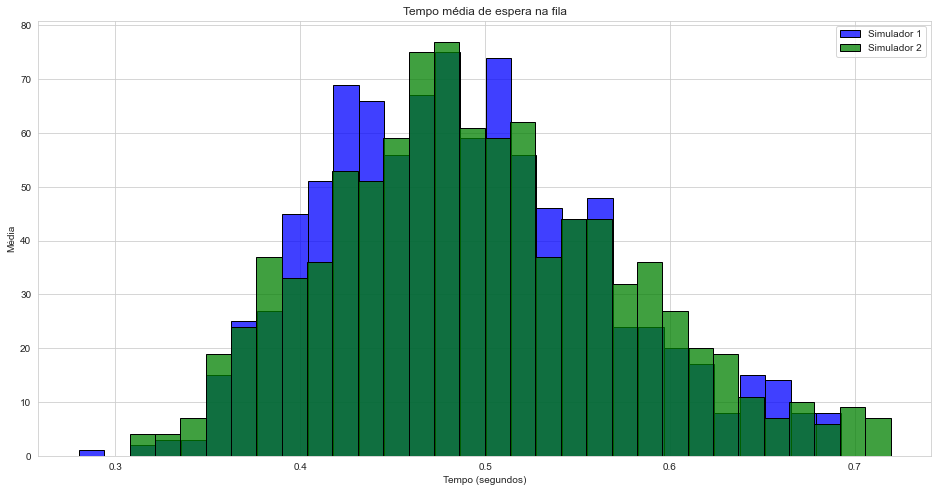

In [36]:
plt.figure(figsize=(16,8))
sns.histplot(data=clean_df.simulador_1, bins=30, color='blue', label='Simulador 1', edgecolor='black')
sns.histplot(data=clean_df.simulador_2, bins=30, color='green', label='Simulador 2', edgecolor='black') 
plt.title('Tempo média de espera na fila')
plt.xlabel('Tempo (segundos)')
plt.ylabel('Média')
plt.legend()
plt.show()